Read Data
Selecting features = 60
Training...  60


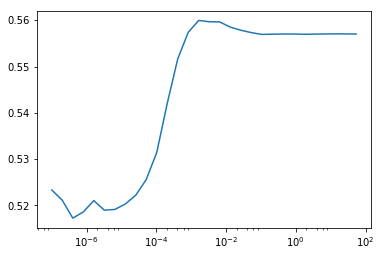

Selecting features = 80
Training...  80


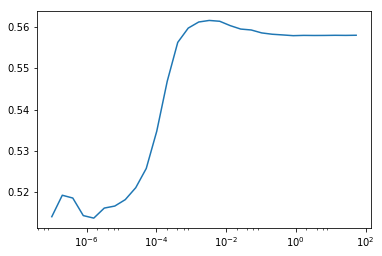

Selecting features = 100
Training...  100


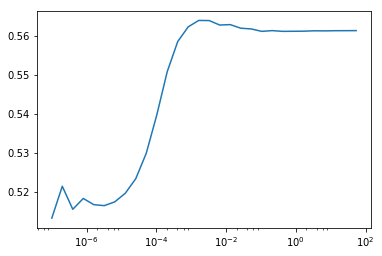

Selecting features = 120
Training...  120


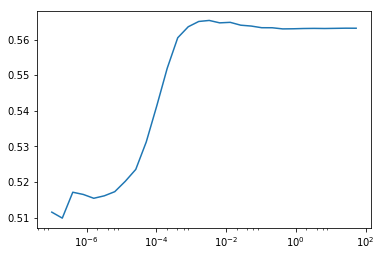

Selecting features = 140
Training...  140


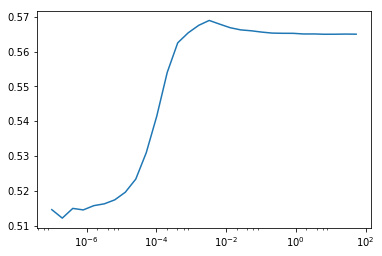

In [4]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainFeatures.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabel.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validationFeatures.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)

k = [60, 80, 100, 120, 140]
maX = 0
for i in range(len(k)):
    print("Selecting features =", k[i])
    selection = SelectKBest(k=k[i]).fit(n_trainX, trainLabel)
    n_trainX_new = selection.transform(n_trainX)
    n_testX_new = selection.transform(n_testX)
    n_testdata_new = selection.transform(n_testdata)
    print("Training... ", k[i])
    C = []
    accuracy = []
    for j in range(30):
        C.append(0.0000001*(2**j))
        
        clf = LogisticRegression(penalty='l2', C = C[j], solver='sag', max_iter=10000)
        clf.fit(n_trainX_new, trainLabel)
        # compute accuracy
        result = clf.score(n_testX_new, testLabel)
        #print("accuracy = ", result)
        accuracy.append(result)
#         if (result > maX):
#             maX = result
#             print("Predict and write to file")
#             answer = clf.predict(n_testdata_new)
#             numpy.savetxt('result.csv', answer, delimiter=',', fmt='%d')
    
    plt.plot(C, accuracy)
    plt.xscale('log')
    plt.show()